simulating 426 neurons. Start: Thu Sep 15 16:33:51 2022
sim end: Thu Sep 15 16:34:50 2022


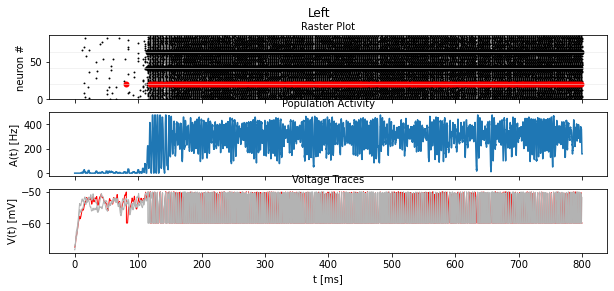

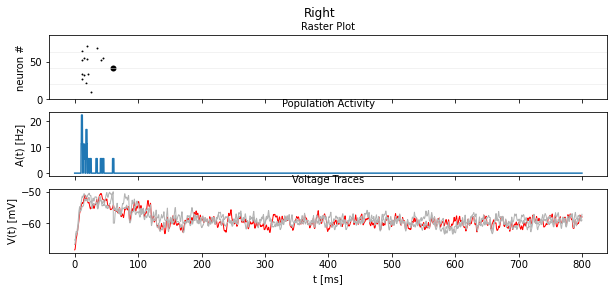

In [6]:
import wang

import brian2 as b2
from neurodynex3.tools import plot_tools
from neurodynex3.competing_populations import decision_making
import matplotlib.pyplot as plt


stim_start = 100. * b2.ms
stim_duration = 700 * b2.ms

pop_rate_list = []


results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                        t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                        coherence_level=+0.90, w_pos=5, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                        max_sim_time=800. * b2.ms)




plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right")
plt.show() 

In [3]:
import numpy as np

In [4]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18

    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()


In [5]:
def pop_rate_to_dict(results):

    pop_rate_a = results["rate_monitor_A"]
    pop_rate_b = results["rate_monitor_B"]
    
    # pop_rate_a is a 

    smooth_pop_rate_a = pop_rate_a.smooth_rate(window="flat",width = 20.1*b2.ms )
    smooth_pop_rate_b = pop_rate_b.smooth_rate(window="flat",width = 20.1*b2.ms )

    np_rate_a = np.array(smooth_pop_rate_a)
    np_rate_b = np.array(smooth_pop_rate_b)



    time = pop_rate_a.t/b2.ms
    pop_rate_results = {}

    pop_rate_results['time'] =  time
    pop_rate_results['pop_rate_a'] =  np_rate_a
    pop_rate_results['pop_rate_b'] =  np_rate_b
    pop_rate_results['stim_info'] = '100ms to 800ms for 700 ms'
    
    return pop_rate_results

In [7]:
 def w_pos_diff(w_pos_value):
    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                    t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                    coherence_level=+0.90, w_pos=w_pos_value, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                    max_sim_time=800. * b2.ms)




    plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Left")
    plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Right")
    plt.show() 

simulating 426 neurons. Start: Thu Sep 15 16:37:06 2022
sim end: Thu Sep 15 16:37:44 2022


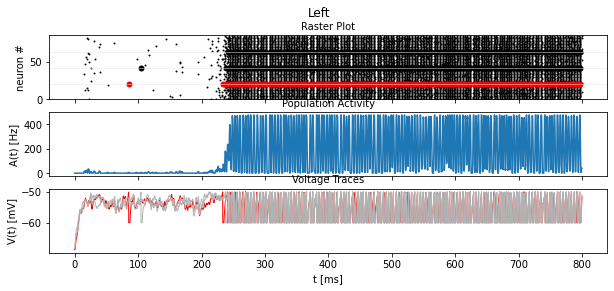

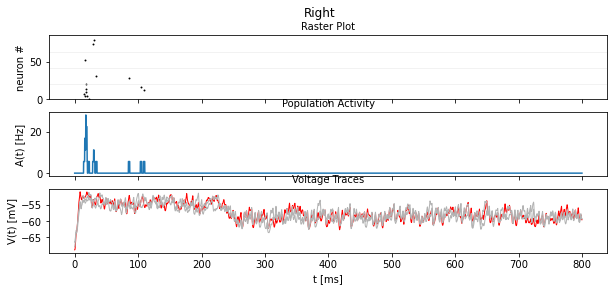

In [8]:
w_pos_diff(4.1)

simulating 426 neurons. Start: Thu Sep 15 16:38:43 2022
sim end: Thu Sep 15 16:40:18 2022


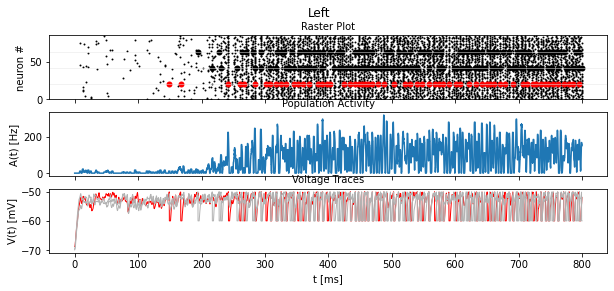

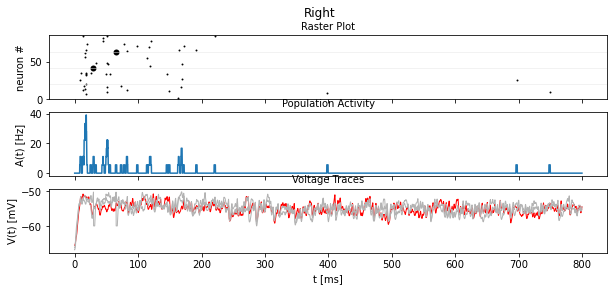

In [9]:
w_pos_diff(2.2)

simulating 426 neurons. Start: Thu Sep 15 16:41:26 2022
sim end: Thu Sep 15 16:42:02 2022


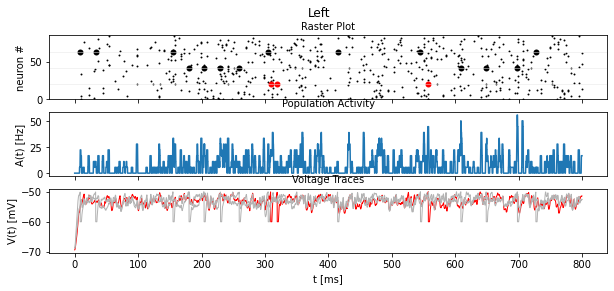

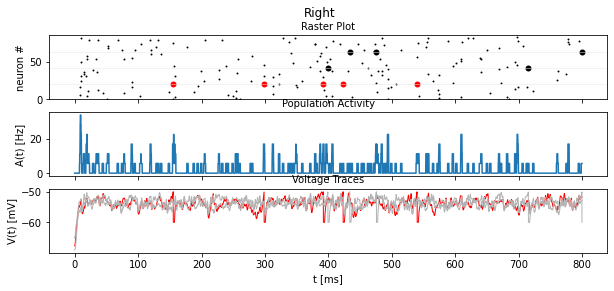

In [10]:
w_pos_diff(1.2)

simulating 426 neurons. Start: Thu Sep 15 16:42:18 2022
sim end: Thu Sep 15 16:43:10 2022


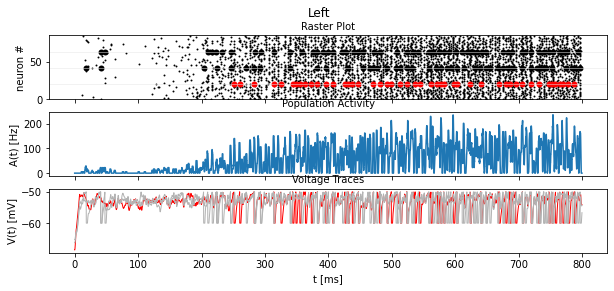

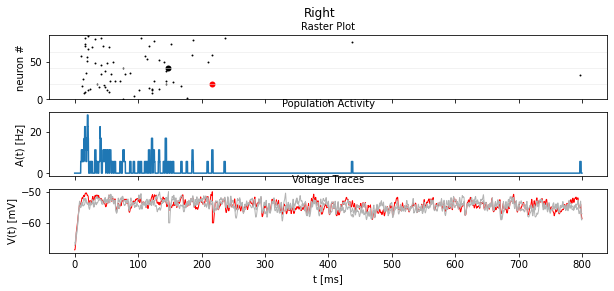

In [11]:
w_pos_diff(2.0)

In [15]:
stim_start = 100. * b2.ms
stim_duration = 700 * b2.ms



def network_sim(w_pos_value, s_durantion):
    
    stim_duration = s_durantion* b2.ms


    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                    t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                    coherence_level=+0.90, w_pos=w_pos_value, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                    max_sim_time=800. * b2.ms)




    plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Left")
    plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Right")
    plt.show() 
    
    return results

simulating 426 neurons. Start: Thu Sep 15 16:47:24 2022
sim end: Thu Sep 15 16:48:14 2022


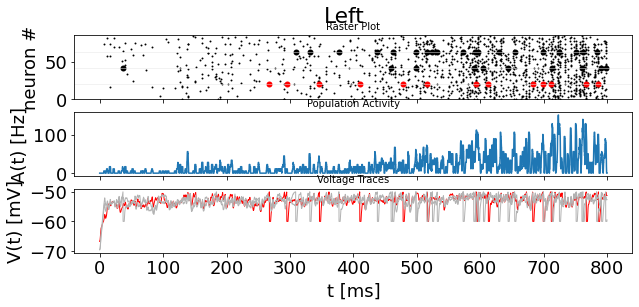

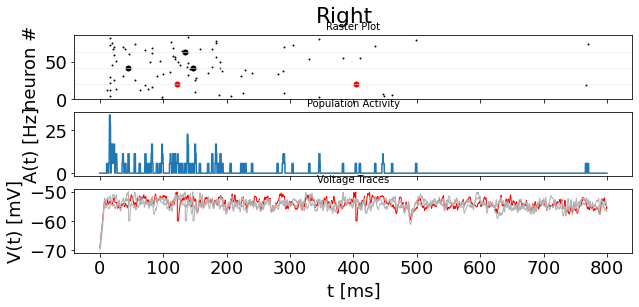

In [16]:
results = network_sim(2.0, 100)

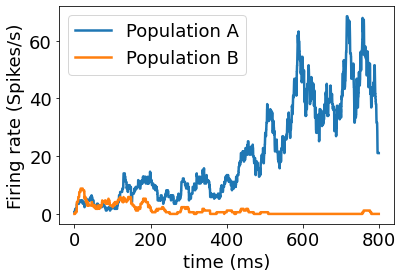

In [17]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)


simulating 426 neurons. Start: Thu Sep 15 16:49:05 2022
sim end: Thu Sep 15 16:50:29 2022


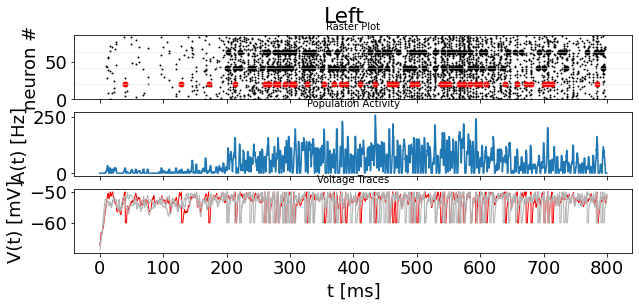

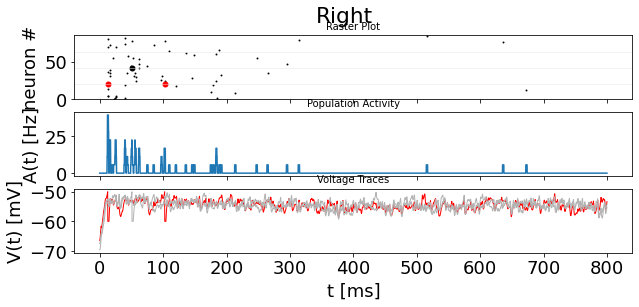

In [18]:
results = network_sim(2.0, 500)

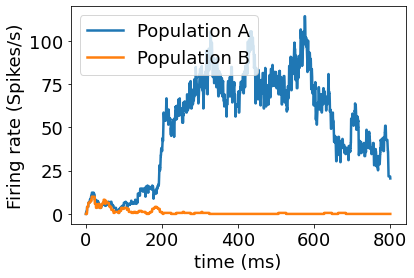

In [19]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

In [21]:
def network_sim(w_pos_value, s_durantion, end_time):
    
    stim_duration = s_durantion* b2.ms
    end_sim = end_time* b2.ms


    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                    t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                    coherence_level=+0.90, w_pos=w_pos_value, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                    max_sim_time=end_sim)




    plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Left")
    plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Right")
    plt.show() 
    
    return results

simulating 426 neurons. Start: Thu Sep 15 16:52:45 2022
sim end: Thu Sep 15 16:54:09 2022


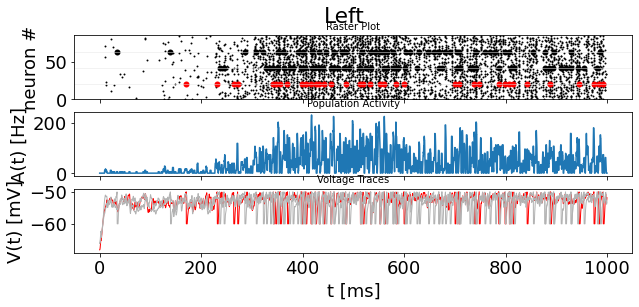

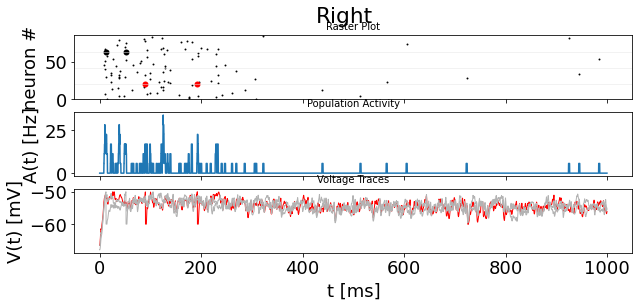

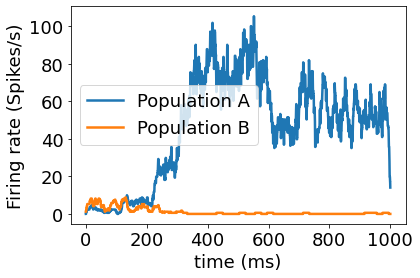

In [22]:
results = network_sim(2.0, 500, 1000)


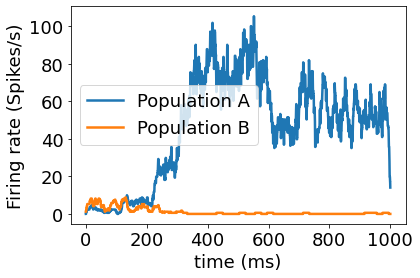

In [23]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

In [26]:
plt.style.use("./nma.mplstyle")


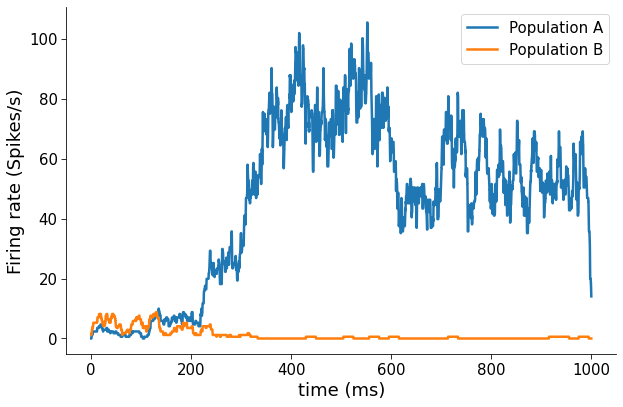

In [27]:
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 16:56:27 2022
sim end: Thu Sep 15 16:57:16 2022


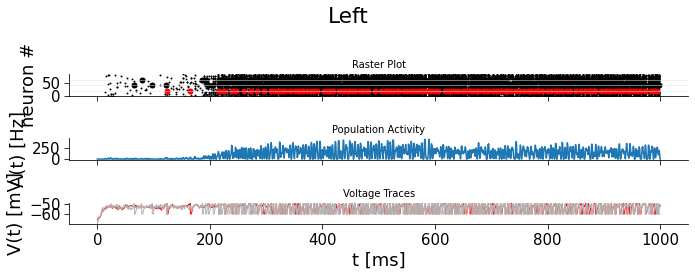

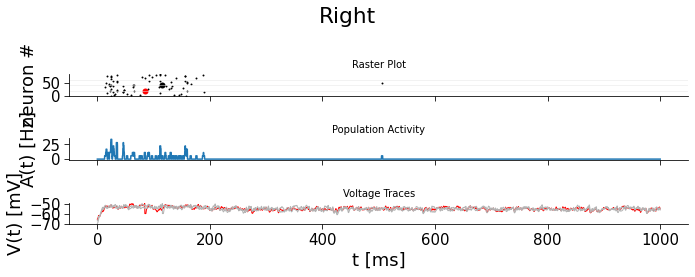

In [28]:
results = network_sim(2.5, 500, 1000)


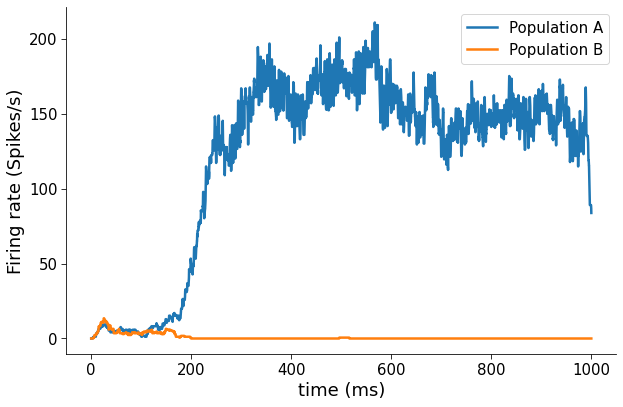

In [29]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 16:58:41 2022
sim end: Thu Sep 15 16:59:33 2022


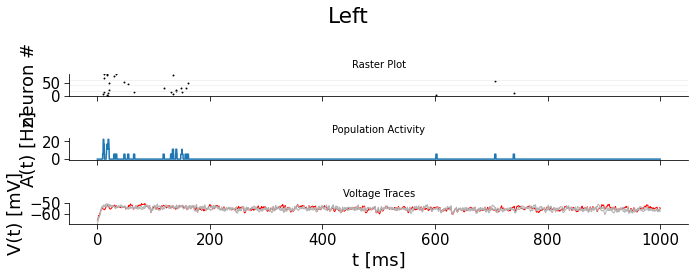

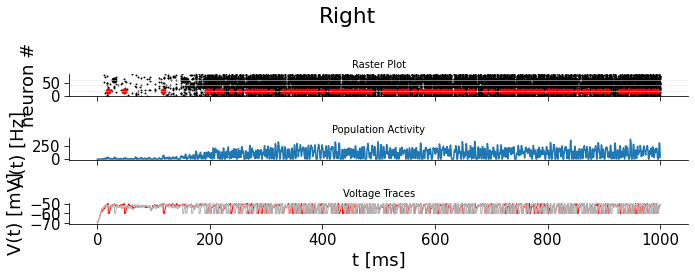

In [30]:
results = network_sim(2.4, 500, 1000)


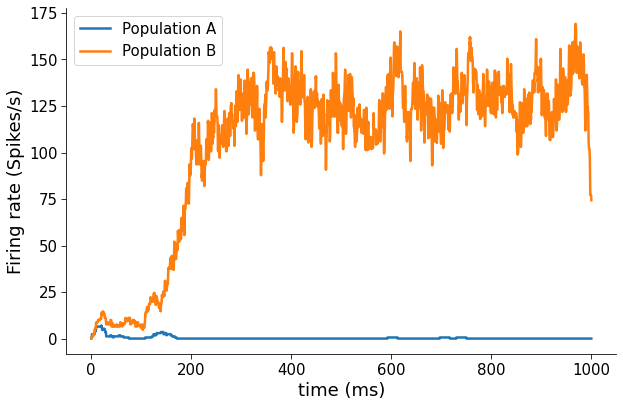

In [31]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:00:34 2022
sim end: Thu Sep 15 17:01:25 2022


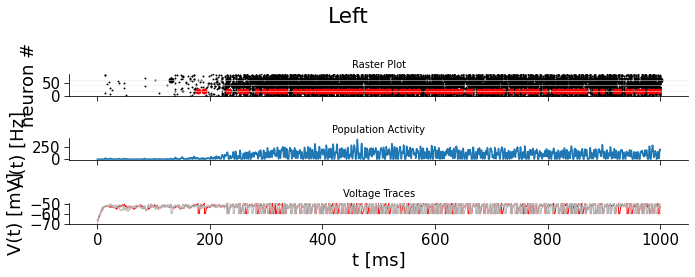

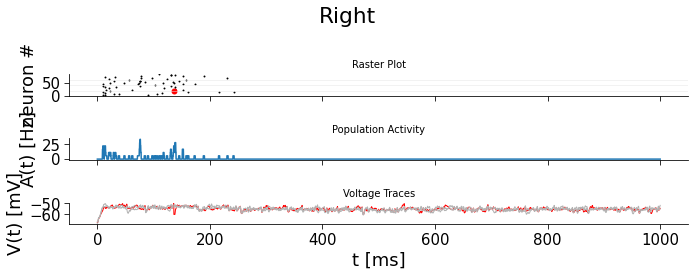

In [32]:
results = network_sim(2.3, 500, 1000)


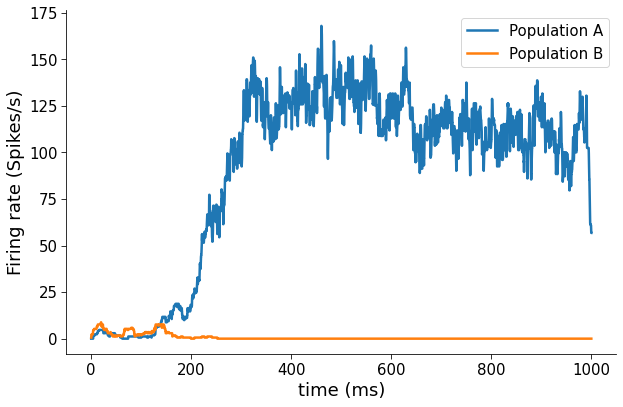

In [33]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:02:22 2022
sim end: Thu Sep 15 17:03:10 2022


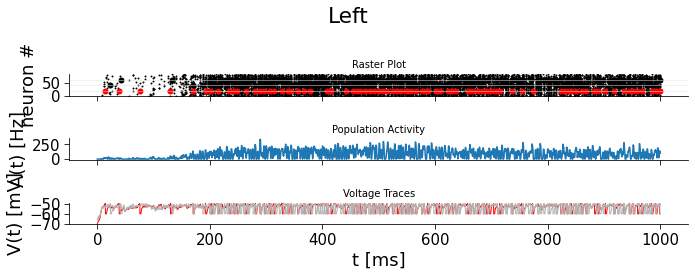

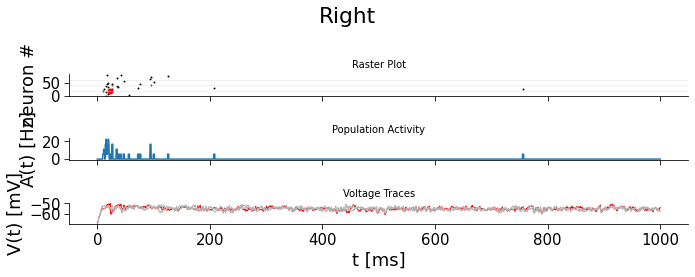

In [34]:
results = network_sim(2.2, 500, 1000)


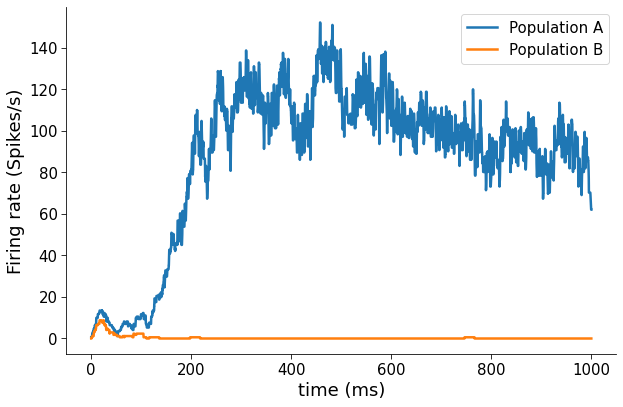

In [35]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:05:06 2022
sim end: Thu Sep 15 17:05:55 2022


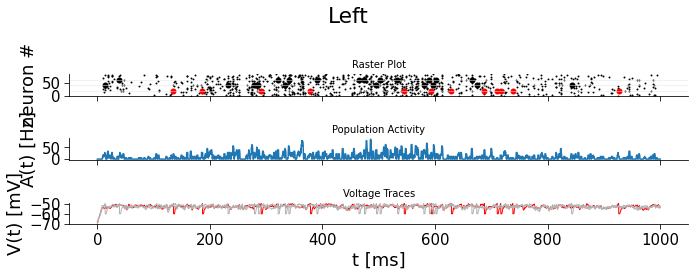

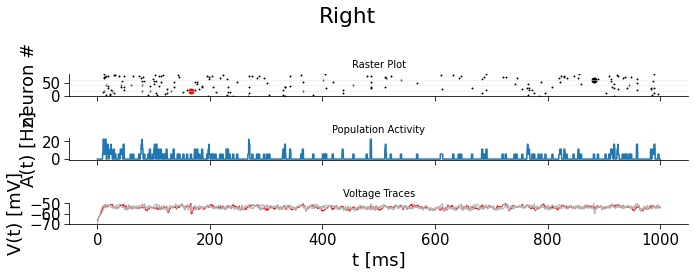

In [36]:
results = network_sim(1.6, 500, 1000)


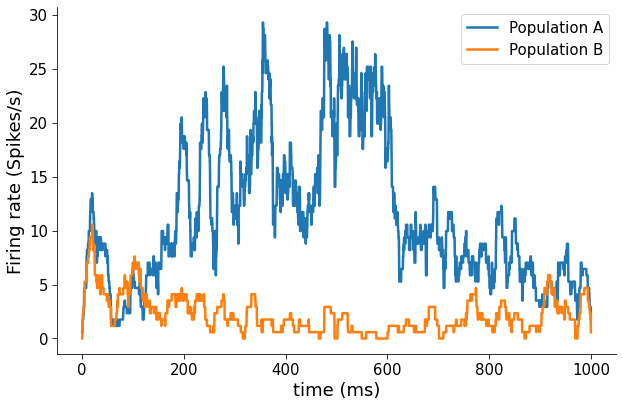

In [37]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:06:34 2022
sim end: Thu Sep 15 17:07:25 2022


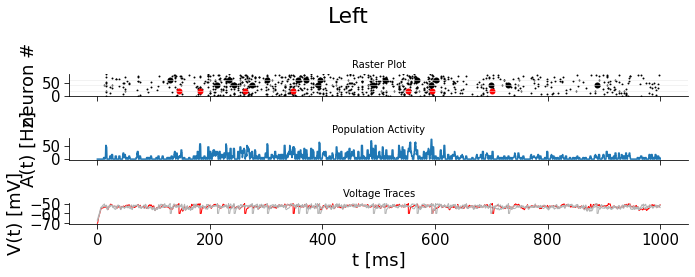

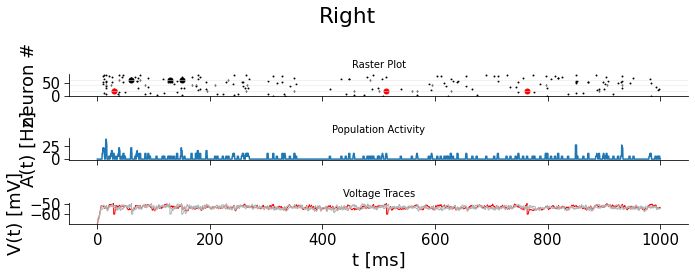

In [38]:
results = network_sim(1.5, 500, 1000)




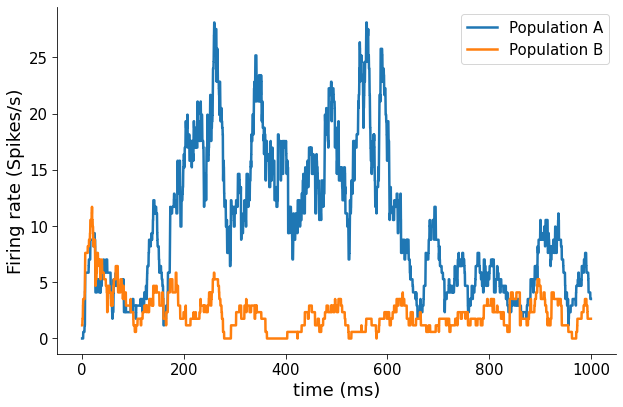

In [39]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:07:27 2022
sim end: Thu Sep 15 17:08:17 2022


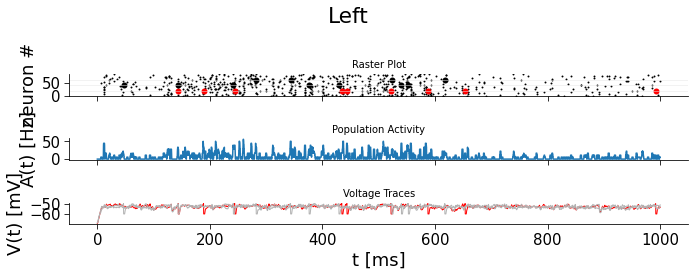

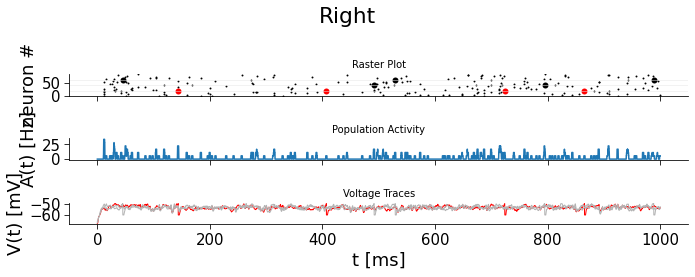

In [40]:
results = network_sim(1.4, 500, 1000)


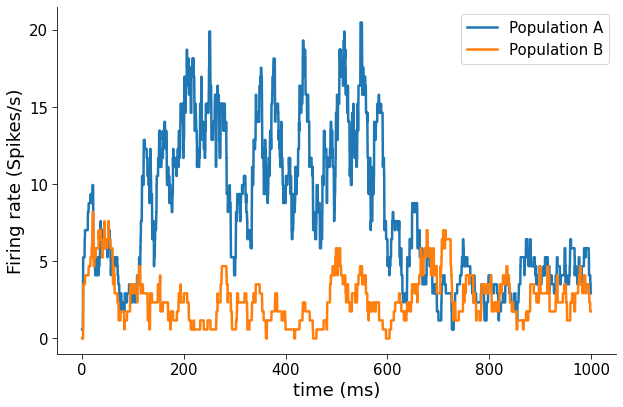

In [41]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:08:19 2022
sim end: Thu Sep 15 17:09:08 2022


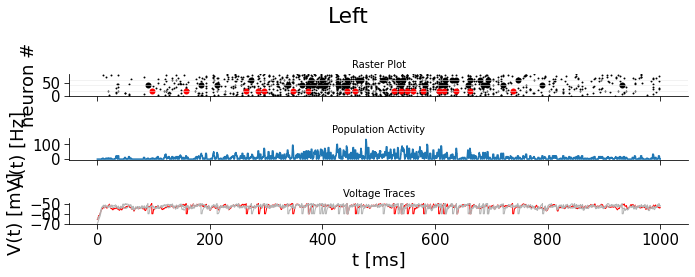

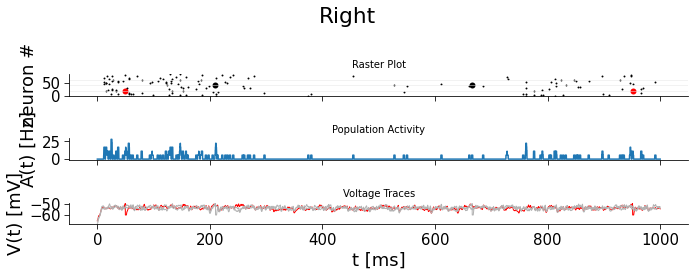

In [42]:
results = network_sim(1.7,  500, 1000)


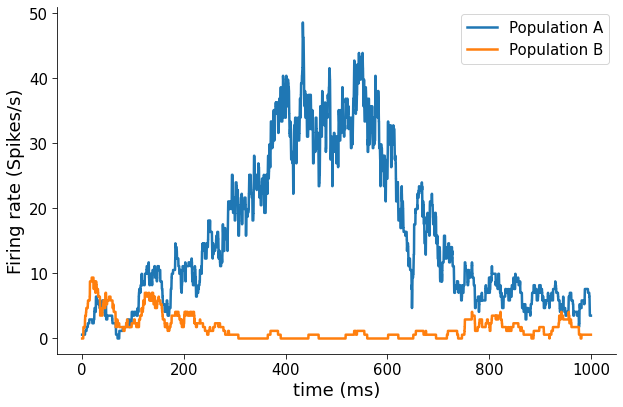

In [43]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:11:46 2022
sim end: Thu Sep 15 17:12:33 2022


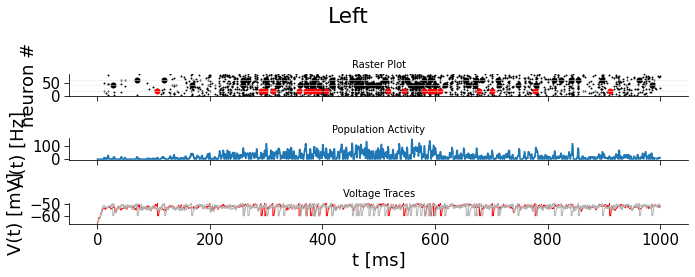

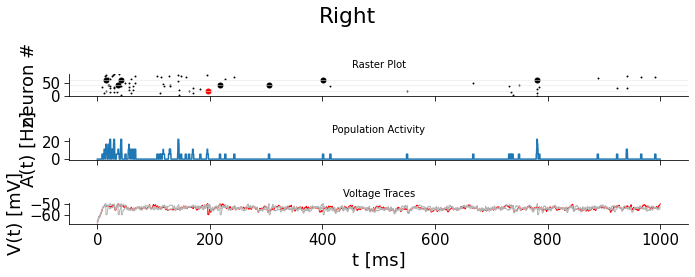

In [44]:
results = network_sim(1.8,  500, 1000)


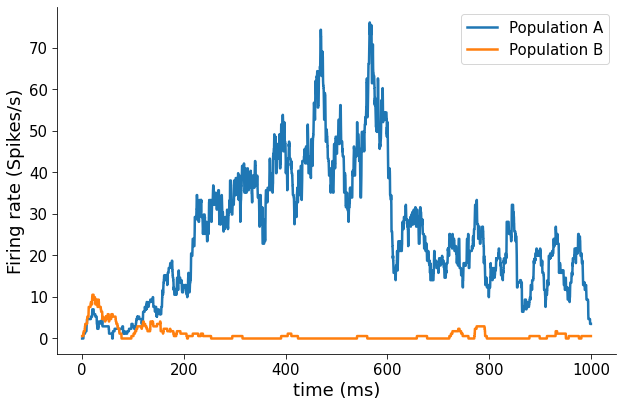

In [45]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

simulating 426 neurons. Start: Thu Sep 15 17:13:26 2022
sim end: Thu Sep 15 17:14:15 2022


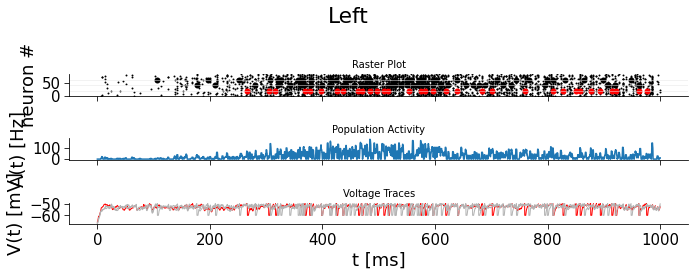

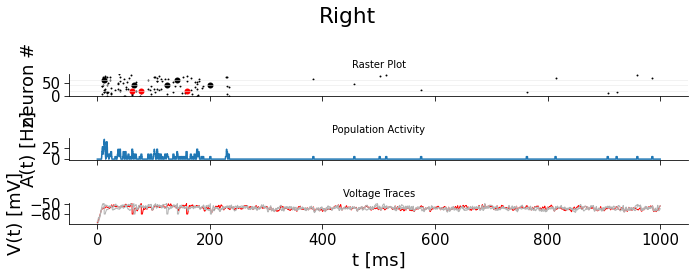

In [46]:
results = network_sim(1.9,  500, 1000)


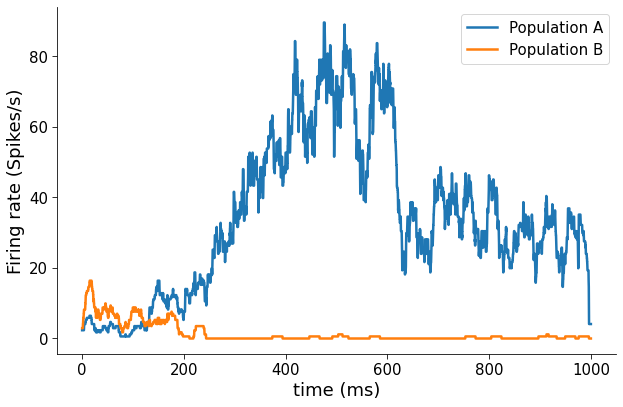

In [47]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)